# Primer Trabajo Práctico

## Grupo B
- Barbero
- Brito Saltos
- Ferreyra
- Fiorotto

El objetivo de este trabajo es crear un Análisis Exploratorio de Datos y generar un
informe interpretativo del mismo. Para esto se trabajará con el archivo sube2020.csv en el cual están registradas todas las
transacciones realizadas durante el año 2020. Luego del AED (Análisis Exploratorio de Datos) correspondiente, se deberá utilizar una o más celdas para presentar las interpretaciones y conclusiones con Markdown.

## Descripción de Campos

| Etiqueta | Descripción | Tipo de Dato |
| :--- | :--- | :--- |
| dia_transporte  | Fecha ISO-8601 (date)  | día de transporte informado | 
| nombre_empresa  | Texto (string)         | nombre de la empresa de transporte | 
| linea           | Texto (string)         |descripción de la línea | 
| amba            | Texto (string)         | SI/NO | 
| tipo_transporte | Texto (string)         | colectivo, tren, subte, lanchas | 
| jurisdiccion    | Texto (string)         |jurisdicción de la línea (NACIONAL, PROVINCIAL, MUNICIPAL): en caso de subte queda vacío |
| provincia       | Texto (string)         | nombre de la provincia, en caso de ser jurisdicción provincial o municipal. Si es jurisdicción nacional figura JN. En caso de subte queda vacío | 
| municipio       | Texto (string)         | nombre del municipio, en caso de ser jurisdicción municipal. SI es jurisdicción nacional o provincial figura SD o SN respectivamente. En caso de subte queda vacío | 
| cantidad        | Número entero (integer)|cantidad de transacciones de uso / check-in / checkout sin checkin / Venta de boletos, neteadas de eventuales reversas|
| dato_preliminar |  Texto (string)        | SI/NO |

# Inicio del Trabajo

Montamos el Dataframe

In [1]:
# Importamos Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [118]:
# Importamos en CSV y creamos el DataFrame
# ---> parse_dates = guarda columnas como fechas
df = pd.read_csv(r"E:\Fred\Documentos\2.DataScience\Notebooks\TP\sube2020.csv",parse_dates=['DIA_TRANSPORTE'])  # Importa DataSet desde Dirección de Computadora
df

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2020-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,2154,NO
1,2020-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,1492,NO
2,2020-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1889,NO
3,2020-01-01,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,ALMIRANTE BROWN,4669,NO
4,2020-01-01,EL URBANO SRL,BS_AS_LINEA_522,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LANUS,187,NO
...,...,...,...,...,...,...,...,...,...,...
356623,2020-12-31,EMPRESA CEFERINO SOCIEDAD ANONIMA,Línea G,NO,COLECTIVO,MUNICIPAL,RÍO NEGRO,VIEDMA,55,NO
356624,2020-12-31,UNION PLATENSE SRL,NORTE MUNICIPAL,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LA PLATA,3245,NO
356625,2020-12-31,A T A C O NORTE S A C I,RES_PUERTO_TIROL_Y VIC,NO,COLECTIVO,PROVINCIAL,CHACO,SN,522,NO
356626,2020-12-31,ETACER SRL,STAFE_SANTA FE_LINEA_907,NO,COLECTIVO,NACIONAL,JN,SD,362,NO


In [6]:
# Información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356628 entries, 0 to 356627
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   356628 non-null  object
 1   NOMBRE_EMPRESA   356628 non-null  object
 2   LINEA            356628 non-null  object
 3   AMBA             356628 non-null  object
 4   TIPO_TRANSPORTE  356628 non-null  object
 5   JURISDICCION     354067 non-null  object
 6   PROVINCIA        354067 non-null  object
 7   MUNICIPIO        354067 non-null  object
 8   CANTIDAD         356628 non-null  int64 
 9   DATO_PRELIMINAR  356628 non-null  object
dtypes: int64(1), object(9)
memory usage: 27.2+ MB


In [11]:
# Descripción del DataFrame
data.describe()

,CANTIDAD
count,356628.000000
mean,5026.148881
std,13371.656183
min,-43.000000
25%,287.000000
50%,1313.000000
75%,4840.000000
max,603766.000000


In [12]:
# Descripción del DataFrame de Columnas String
data.describe(include = object)

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,DATO_PRELIMINAR
count,356628,356628,356628,356628,356628,354067,354067,354067,356628
unique,366,273,1167,2,4,3,19,72,1
top,2020-03-09,AUTOTR TRAPICHE SRL Y TRANSP GRAL B.MITRE SRL UTE,LINEA 1,NO,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,NO
freq,1160,13204,1387,211472,346909,158895,115444,158895,356628


## Datos NaN 
Observamos que los mismos corresponden a las columnas **Jurisdicción, Provincia y Municipio** en los cuales los datos vacios corresponden al servicio de **Subte**, por lo tanto No debemos eliminar los mismos.

In [8]:
# Datos Nan
data.isna().mean()*100

DIA_TRANSPORTE     0.000000
NOMBRE_EMPRESA     0.000000
LINEA              0.000000
AMBA               0.000000
TIPO_TRANSPORTE    0.000000
JURISDICCION       0.718115
PROVINCIA          0.718115
MUNICIPIO          0.718115
CANTIDAD           0.000000
DATO_PRELIMINAR    0.000000
dtype: float64

Por lo tanto vamos a reemplazar los datos vacios por el string "Subte"

In [36]:
# Copiamos el Dataframe original (df) en un nuevo DataFrame (dr_new), así no no modificarmos el orginal 
df_new = df              

# Remplazamos los celdas NaN
df_new["JURISDICCION"] = df_new["JURISDICCION"].fillna("SUBTE CABA")
df_new["PROVINCIA"] = df_new["PROVINCIA"].fillna("SUBTE CABA")
df_new["MUNICIPIO"] = df_new["MUNICIPIO"].fillna("SUBTE CABA")

#Verificamos 
df_new.isna().mean()*100

DIA_TRANSPORTE     0.0
NOMBRE_EMPRESA     0.0
LINEA              0.0
AMBA               0.0
TIPO_TRANSPORTE    0.0
JURISDICCION       0.0
PROVINCIA          0.0
MUNICIPIO          0.0
CANTIDAD           0.0
DATO_PRELIMINAR    0.0
dtype: float64

Modificamos en la columnas:
- PROVINCIA: "JN" por "JURISDICCION NACIONAL"
- JURISDICCION: "SD" por "JURISDICCION NACIONAL"
- JURISDICCION: "SN" por "JURISDICCION PROVINCIAL"

In [54]:
df_new["PROVINCIA"].replace({"JN":"JURISDICCION NACIONAL"},inplace=True)
df_new["MUNICIPIO"].replace({"SD":"JURISDICCION NACIONAL"},inplace=True)
df_new["MUNICIPIO"].replace({"SN":"JURISDICCION PROVINCIAL"},inplace=True)

Analizamos lo valores Únicos de las columnas JURISDICCION, PROVINCIA JURISDICCION y MUNICIPIO

In [50]:
df_new.PROVINCIA.value_counts()

BUENOS AIRES             115444
MENDOZA                   73880
JURISDICCION NACIONAL     57376
SAN JUAN                  24176
JUJUY                     19802
NEUQUÉN                   11201
SANTA FE                   8586
RÍO NEGRO                  8202
ENTRE RÍOS                 5957
CHUBUT                     5421
CATAMARCA                  5171
CHACO                      4098
SAN LUIS                   4027
FORMOSA                    3426
CORRIENTES                 3190
LA PAMPA                   2605
SUBTE CABA                 2561
TIERRA DEL FUEGO            732
LA RIOJA                    672
CORDOBA                     101
Name: PROVINCIA, dtype: int64

In [40]:
df_new.JURISDICCION.value_counts()

PROVINCIAL    158895
MUNICIPAL     137796
NACIONAL       57376
SUBTE CABA      2561
Name: JURISDICCION, dtype: int64

In [55]:
df_new.MUNICIPIO.value_counts()

JURISDICCION PROVINCIAL         158895
JURISDICCION NACIONAL            57376
SAN SALVADOR DE JUJUY            16105
GENERAL PUEYRREDON                9497
NEUQUEN                           8859
                                 ...  
PINAMAR                            184
PRESIDENCIA ROQUE SAENZ PEÑA       138
VILLA ALLENDE                      101
MERCEDES                            80
VILLA CONSTITUCION                  58
Name: MUNICIPIO, Length: 73, dtype: int64

## ANALISIS EXPLORATORIO DE DATOS

### a) cantidad de transacciones  por Provincia en 2020

In [111]:
Prov_Cant = df_new.groupby("PROVINCIA").CANTIDAD.count().sort_values(ascending=False) # count() --> Cuenta  / sort_values()  --> ordena
# Prov_Cant.index[:]
# Prov_Cant.values[:]
Prov_Cant

PROVINCIA
BUENOS AIRES             115444
MENDOZA                   73880
JURISDICCION NACIONAL     57376
SAN JUAN                  24176
JUJUY                     19802
NEUQUÉN                   11201
SANTA FE                   8586
RÍO NEGRO                  8202
ENTRE RÍOS                 5957
CHUBUT                     5421
CATAMARCA                  5171
CHACO                      4098
SAN LUIS                   4027
FORMOSA                    3426
CORRIENTES                 3190
LA PAMPA                   2605
SUBTE CABA                 2561
TIERRA DEL FUEGO            732
LA RIOJA                    672
CORDOBA                     101
Name: CANTIDAD, dtype: int64

Graficamos en un Gráfico de Barras

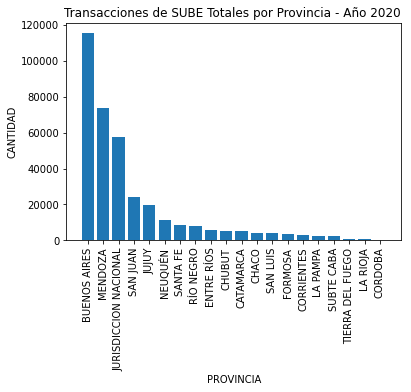

In [139]:
# Create bars
plt.bar(Prov_Cant.index[:],Prov_Cant.values[:] )

# Create names on the x-axis
plt.xticks(Prov_Cant.index[:], rotation=90 )

# Add title and axis names
plt.title('Transacciones de SUBE Totales por Provincia - Año 2020 ')
plt.xlabel("PROVINCIA")
plt.ylabel("CANTIDAD")

# Show graphic
plt.show()

### b) cantidad de transacciones por Mes en 2020

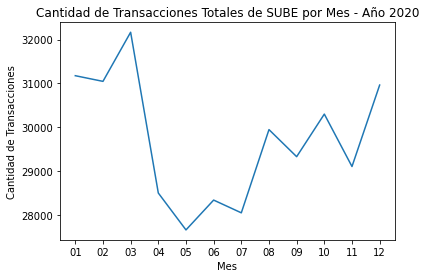

In [138]:
#Genero un dataframe con la informacion a graficar

#Me quedo con el mes como string
df_new["Mes"] = df["DIA_TRANSPORTE"].dt.strftime("%m")
#df_new["Mes"].replace({"01":"Ene.","02":"Feb.","03":"Mar.","04":"Abr.","05":"May.","06":"Jun.",
#                       "07":"Jul.","08":"Ago.","09":"Sep.","10":"Oct.","11":"Nov","12":"Dec"},inplace=True)

#Cuento cuantos datos tengo por año
df_graficar = df_new.groupby("Mes").CANTIDAD.count()

#Creamos la figura 
fig, ax = plt.subplots()

#Dibujamos en la figura un grafico de lineas
ax.plot(df_graficar.index, df_graficar.values)

#Seteamos label, titulo y leyenda
ax.set_xlabel("Mes")
ax.set_ylabel("Cantidad de Transacciones")
ax.set_title("Cantidad de Transacciones Totales de SUBE por Mes - Año 2020")
plt.show()

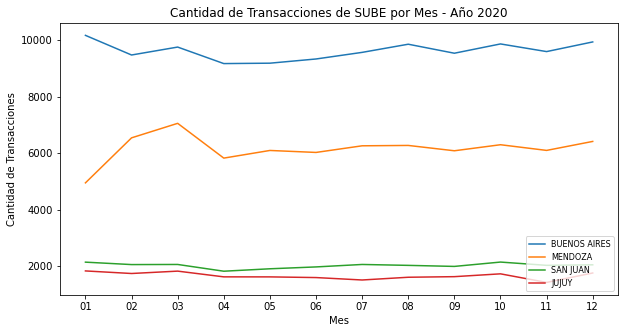

In [205]:
prov = ["BUENOS AIRES","MENDOZA","SAN JUAN","JUJUY"]

#Creamos la figura 
fig, ax = plt.subplots(figsize=(10,5))

#Dibujamos en la figura un grafico de lineas
for i,provincia in enumerate(prov):
    ax.plot(df_new[df_new.PROVINCIA == provincia].groupby("Mes").CANTIDAD.count().index, 
            df_new[df_new.PROVINCIA == provincia].groupby("Mes").CANTIDAD.count().values,
            label = provincia)

#Seteamos label, titulo y leyenda
ax.set_xlabel("Mes")
ax.set_ylabel("Cantidad de Transacciones")
ax.set_title("Cantidad de Transacciones de SUBE por Mes - Año 2020")
ax.legend(loc="lower right",fontsize=8)
plt.show()



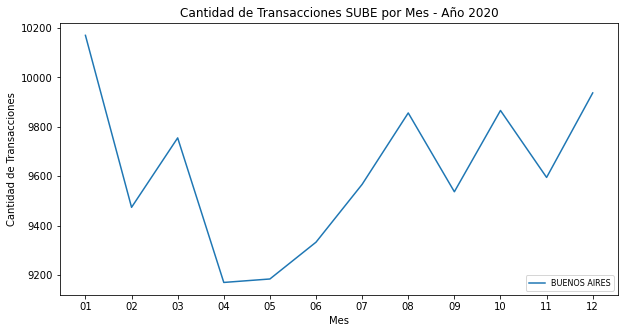

In [209]:
#Creamos la figura 
fig, ax = plt.subplots(figsize=(10,5))

#Dibujamos en la figura un grafico de lineas
ax.plot(df_new[df_new.PROVINCIA == "BUENOS AIRES"].groupby("Mes").CANTIDAD.count().index, 
        df_new[df_new.PROVINCIA == "BUENOS AIRES"].groupby("Mes").CANTIDAD.count().values,
        label = "BUENOS AIRES")

#Seteamos label, titulo y leyenda
ax.set_xlabel("Mes")
ax.set_ylabel("Cantidad de Transacciones")
ax.set_title("Cantidad de Transacciones SUBE por Mes - Año 2020")
ax.legend(loc="lower right",fontsize=8)
plt.show()

In [224]:
df_new[df_new.PROVINCIA == "BUENOS AIRES"].groupby( "Mes" & "MUNICIPIO" ).count()


TypeError: unsupported operand type(s) for &: 'str' and 'str'

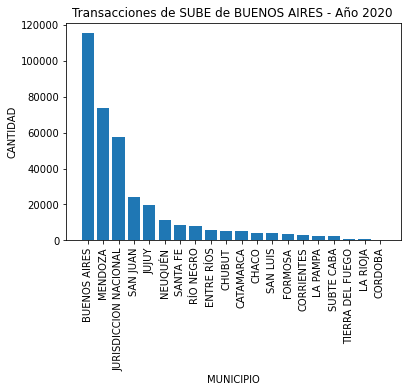

In [211]:
# Create bars
plt.bar(Prov_Cant.index[:],Prov_Cant.values[:] )

# Create names on the x-axis
plt.xticks(Prov_Cant.index[:], rotation=90 )

# Add title and axis names
plt.title('Transacciones de SUBE de BUENOS AIRES - Año 2020 ')
plt.xlabel("MUNICIPIO")
plt.ylabel("CANTIDAD")

# Show graphic
plt.show()

In [160]:
df_new[(df_new.PROVINCIA == "BUENOS AIRES") & (df_new.AMBA == "NO")].CANTIDAD.value_counts()


1        228
2        167
3        120
4        117
6        114
        ... 
5864       1
7913       1
11447      1
9966       1
5656       1
Name: CANTIDAD, Length: 6798, dtype: int64

In [163]:
df_new[df_new.PROVINCIA == "BUENOS AIRES"].groupby("Mes").CANTIDAD.count()

Mes
01    10170
02     9474
03     9755
04     9170
05     9184
06     9333
07     9567
08     9856
09     9537
10     9866
11     9595
12     9937
Name: CANTIDAD, dtype: int64

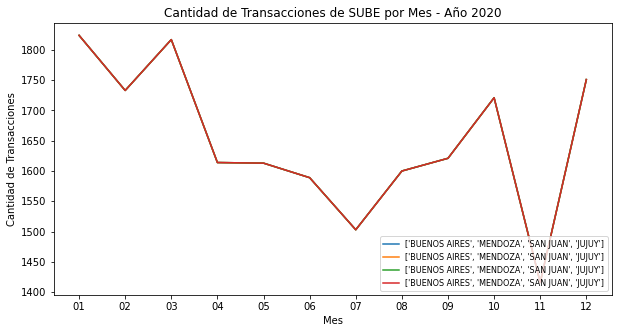

In [207]:
def graf_mes(dt_gropu,lista,title,xlabel,ylabel):
    #Creamos la figura 
    fig, ax = plt.subplots(figsize=(10,5))

    #Dibujamos en la figura un grafico de lineas
    for i,etiqueta in enumerate(lista):
        ax.plot(dt_gropu.index, 
                dt_gropu.values,
                label = lista)
        
    #Seteamos label, titulo y leyenda
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc="lower right",fontsize=8)
    plt.show()

condicion = df_new[df_new.PROVINCIA == provincia].groupby("Mes").CANTIDAD.count()
prov = ["BUENOS AIRES","MENDOZA","SAN JUAN","JUJUY"]
title = "Cantidad de Transacciones de SUBE por Mes - Año 2020"
xlabel = "Mes"
ylabel = "Cantidad de Transacciones"
graf_mes(condicion,prov,title,xlabel,ylabel)


## Conclusiones

### a) Cantidad de transacciones por Provincia en 2020